# Introduction to Feature Engineering <font color='blue'> </font>

# Google doc with code corrections is accessible at:
### https://docs.google.com/document/d/19Um3u0V7dekptT0NBE-ArPf0MHe74xQA_BMueBD0Vpw/edit?usp=sharing

# 0) Importing the right tools <font color='blue'> </font>

### <font color='red'>0.1) Import the necessary packages: </font>

- pandas (aliased as pd)
- numpy (aliased as np)
- seaborn (aliased as sns)
- matplotlib.pyplot (aliased as plt)

In [4]:
from __future__ import division

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/Users/nathanielbern/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### <font color='red'>0.2) Import the dataset from <i>'../data/data_after_collection_cleaning.csv'</i></font>

In [5]:
raw_data = pd.read_csv('../data/data_after_collection_cleaning.csv')
data = raw_data.copy()

### <font color='red'>0.3) Print samples of data so you are familiar with the data </font>

In [6]:
data.sample(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,total_docks_start,total_docks_end,Precipitationmm,Conditions,TemperatureC
719350,193,2015-06-24 12:03:00,2015-06-24 12:06:00,536,1 Ave & E 30 St,40.741444,-73.975361,476,E 31 St & 3 Ave,40.743943,-73.979661,19229,Subscriber,1992,1,29,47,0,Clear,21.1
865293,384,2015-06-29 08:28:00,2015-06-29 08:35:00,494,W 26 St & 8 Ave,40.747348,-73.997236,491,E 24 St & Park Ave S,40.740964,-73.986022,18775,Subscriber,1970,1,35,53,0,Clear,18.3


## 1) Week-end, Weekday <font color='blue'>  </font>

### Weekday

### <font color='red'>1.1) Import the calendar package and get help on it </font>

In [5]:
import calendar

In [6]:
help(calendar)

Help on module calendar:

NAME
    calendar - Calendar printing functions

FILE
    /Users/nathanielbern/anaconda/lib/python2.7/calendar.py

MODULE DOCS
    http://docs.python.org/library/calendar

DESCRIPTION
    Note when comparing these calendars to the ones printed by cal(1): By
    default, these calendars have Monday as the first day of the week, and
    Sunday as the last (the European convention). Use setfirstweekday() to
    set the first day of the week (0=Monday, 6=Sunday).

CLASSES
    exceptions.ValueError(exceptions.StandardError)
        IllegalMonthError
        IllegalWeekdayError
    
    class IllegalMonthError(exceptions.ValueError)
     |  # Exceptions raised for bad input
     |  
     |  Method resolution order:
     |      IllegalMonthError
     |      exceptions.ValueError
     |      exceptions.StandardError
     |      exceptions.Exception
     |      exceptions.BaseException
     |      __builtin__.object
     |  
     |  Methods defined here:
     |  
     

### <font color='red'>1.2) Change starttime and stoptime columns of <i>data</i> to the right <i>datetime</i> format </font>

In [12]:
data['starttime'] = pd.to_datetime(data['starttime'], format="%Y-%m-%d %H:%M")
data['stoptime'] = pd.to_datetime(data['stoptime'], format="%Y-%m-%d %H:%M")

In [13]:
data.sample(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,total_docks_start,total_docks_end,Precipitationmm,Conditions,TemperatureC
599534,226,2015-06-20 15:22:00,2015-06-20 15:26:00,492,W 33 St & 7 Ave,40.750200,-73.990931,494,W 26 St & 8 Ave,40.747348,-73.997236,16339,Subscriber,1976,1,49,35,0,Overcast,19.4
14709,724,2015-06-01 21:12:00,2015-06-01 21:25:00,236,St Marks Pl & 2 Ave,40.728419,-73.987140,377,6 Ave & Canal St,40.722438,-74.005664,20527,Subscriber,1991,2,39,47,0,Overcast,13.3


### <font color='red'>1.3) Run the following block with different day indexes, so you can see what <i>calendar.day_name[index_day]</i> returns </font>

In [22]:
index_day = 0
print calendar.day_name[index_day]

Monday


### <font color='red'>1.4) Run the following block so you get the day index of a given observation, as well as its week-day using <i>calendar</i></font>

In [23]:
example_observation = data.iloc[0] 
print example_observation.starttime.weekday()
print calendar.day_name[example_observation.starttime.weekday()]

0
Monday


### <font color='red'>1.5) Create a column in the dataframe, containing the day of the week of a given trip. You can use the following functions:</font>
- pd.column_name.apply()
- calendar.day_name[day_number_here] (notice the brackets)
- datetime.weekday()

<font color='green'> <b>Any function can be passed to pd.column_name.apply(name_of_your_function), for instance you could use the <i>lambda functions</i></b>:
- new_column = pd.column_name.apply(lambda x: x.attribute_of_x) will create a new column, based on the attributes of elements of the old column.<font color='green'>

In [14]:
import calendar

In [18]:
calendar.day_name[0]
data.loc[0].starttime.weekday()

0

In [9]:
data['start_day'] = data.starttime.apply(lambda x: calendar.day_name[x.weekday()])

### <font color='red'>1.6) Print samples of data to make sure the column has been created successfully </font>

In [10]:
data.sample(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,total_docks_start,total_docks_end,Precipitationmm,Conditions,TemperatureC,start_day
627014,576,2015-06-21 17:21:00,2015-06-21 17:30:00,459,W 20 St & 11 Ave,40.746745,-74.007756,435,W 21 St & 6 Ave,40.741740,...,16015,Subscriber,1991,1,49,47,0.02,Mostly Cloudy,28.3,Sunday
722431,315,2015-06-24 13:51:00,2015-06-24 13:56:00,522,E 51 St & Lexington Ave,40.757148,-73.972078,519,Pershing Square North,40.751873,...,19021,Subscriber,1957,1,51,61,0.00,Clear,22.8,Wednesday


### <font color='red'>1.7) Use the <i>seaborn</i> package, and more specifically <i>sns.countplot</i>, to plot the number of trips per week day</font>

/Users/nathanielbern/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


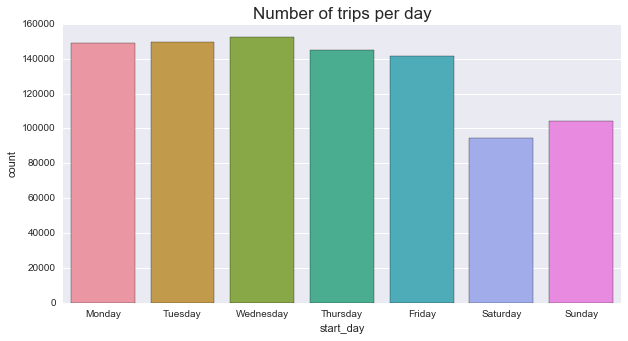

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data.start_day)
plt.title('Number of trips per day', fontsize=17)

### <font color='red'>1.8) Define a new binary column, with True if day is on the week-end, False otherwise. You can use the <i>pandas.column_name.apply()</i> function.</font>

In [12]:
data['is_weekend'] = data['start_day'].apply(lambda x: x in {'Saturday', 'Sunday'})

### <font color='red'>1.9) Plot samples of data to check success of operation</font>

In [13]:
data.sample(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,usertype,birth year,gender,total_docks_start,total_docks_end,Precipitationmm,Conditions,TemperatureC,start_day,is_weekend
37936,379,2015-06-03 11:29:00,2015-06-03 11:36:00,533,Broadway & W 39 St,40.752996,-73.987216,526,E 33 St & 5 Ave,40.747659,...,Subscriber,1989,2,50,39,0.02,Overcast,11.7,Wednesday,False
495277,1307,2015-06-17 15:03:00,2015-06-17 15:25:00,471,Grand St & Havemeyer St,40.712868,-73.956981,261,Johnson St & Gold St,40.694749,...,Subscriber,1988,1,31,27,0.25,Clear,24.4,Wednesday,False


## 2) Morning/afternoon/evening/night <font color='blue'>  </font>

### <font color='red'>2.1) Define a function that returns a string depending on its parameter x. If:</font>
- x.hour is strictly under 6 or strictly over 22, return 'night'
- x.hour is strictly over 18 and under 22, return 'evening'
- x.hour is strictly over 12 and under 18, return 'afternoon'
- otherwise return 'morning'

In [14]:
def time_of_day(x):
    if x.hour < 6 or x.hour > 22:
        return 'night'
    elif 18 < x.hour <= 22:
        return 'evening'
    elif 12 < x.hour <= 18:
        return 'afternoon'
    else:
        return 'morning'

### <font color='red'>2.2) Apply the function to the <i>starttime</i> column of <i>data</i> to create a new feature , using <i>pandas.apply()</i> function</font>

In [15]:
data['start_moment'] = data['starttime'].apply(time_of_day)

### <font color='red'>2.3) Use <i>seaborn.countplot()</i> to plot the number of trips per moment of the day, with axes labels, and a title</font>

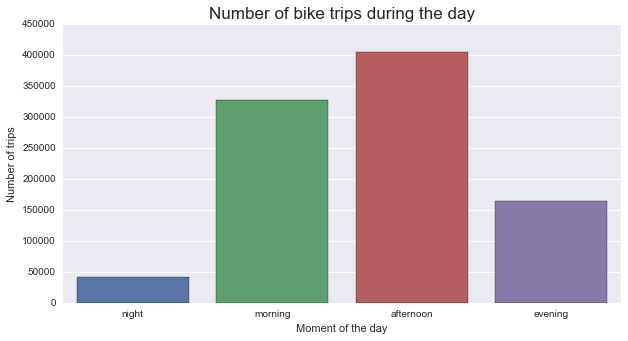

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data.start_moment)
plt.xlabel('Moment of the day')
plt.ylabel('Number of trips')
plt.title('Number of bike trips during the day', fontsize=17)

### <font color='red'>2.4) Use <i>seaborn.countplot()</i> to plot the number of trips per weekday and per time of day</font>

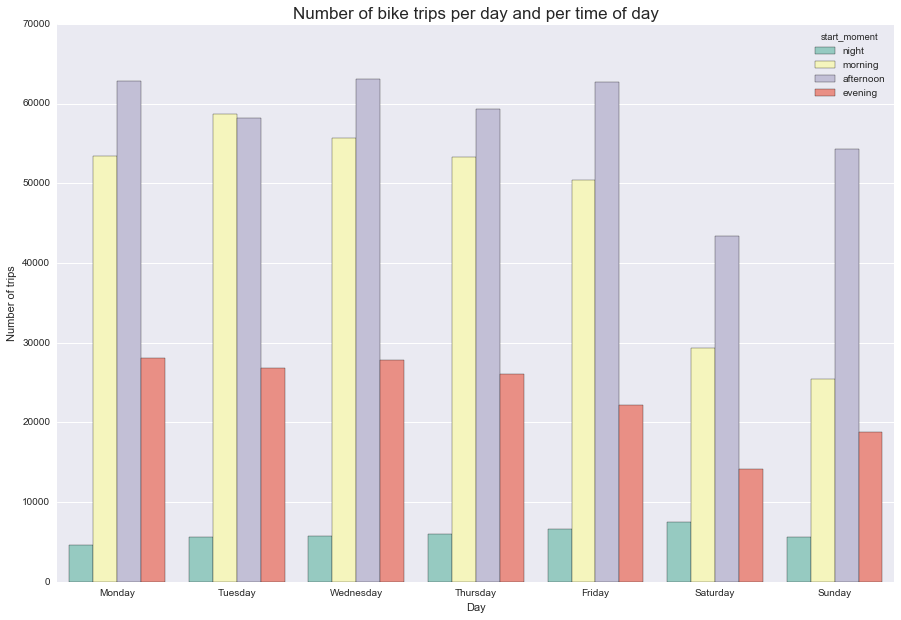

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(x='start_day', hue='start_moment', data=data, palette="Set3")
plt.xlabel('Day')
plt.ylabel('Number of trips')
plt.title('Number of bike trips per day and per time of day', fontsize=17)

## 3) Is rainy <font color='blue'>  </font>

### <font color='red'>3.1) Define a new binary column, with 1 if day is rainy, 0 otherwise. You can use the <i>pandas.column_name.apply()</i> function.</font>

In [18]:
data['is_rainy'] = data.Conditions.apply(lambda condition: 'Rain' in condition)

### <font color='red'>3.2) Print <i>samples</i> of data to check if the operation was successful</font>

In [32]:
data.sample(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,total_docks_start,total_docks_end,Precipitationmm,Conditions,TemperatureC,start_day,is_weekend,start_moment,is_rainy
421506,387,2015-06-15 07:56:00,2015-06-15 08:03:00,326,E 11 St & 1 Ave,40.729538,-73.984267,325,E 19 St & 3 Ave,40.736245,...,2,27,35,0.03,Overcast,19.85,Monday,False,morning,False
284424,695,2015-06-10 19:51:00,2015-06-10 20:03:00,461,E 20 St & 2 Ave,40.735877,-73.982050,250,Lafayette St & Jersey St,40.724561,...,2,39,40,0.00,Partly Cloudy,25.00,Wednesday,False,evening,False


## 4) Is circle trip <font color='blue'> </font>

### <font color='red'>4.1) Define a new binary column, with 1 if trip was loopy, 0 otherwise. You can use a boolean comparison of two columns of the dataframe.</font>

In [33]:
data['is_circle_trip'] = data['start station id'] == data['end station id']

### <font color='red'>4.2) Print the proportion of circle trips in the dataset.</font>

In [34]:
circle_trips_fraction = data['is_circle_trip'].sum()/len(data)  # see if there is a method to count only the True values (list.count equivalent)
print 'Proportion of circle trips: {:.1%}'.format(circle_trips_fraction)

Proportion of circle trips: 2.2%


## 5) Understanding trip evolution in June <font color='blue'>  </font>

### <font color='red'>5.1) Add a new column with the trip day number. Since all trips in the dataset occured in June, we will name this column "june_day". You can use the <i>datetime.day</i> attribute of the starttime</font>

In [35]:
data['june_day'] = data.starttime.apply(lambda x: x.day)

### <font color='red'>5.2) Group by the columns with respect to day in June, using <i>data.groupby()</i></font>

In [36]:
grouped_by_data = data.groupby('june_day')

In [37]:
grouped_by_data

### <font color='red'>5.3) Aggregate the grouped by data with respect to mean temperature, and number of trips, using the <i>.count()</i> and <i>.mean()</i> methods of <i>data.groupby()</i></font>

In [38]:
aggregate_count_trips = grouped_by_data.count()
aggregate_temperature = grouped_by_data.mean()

### <font color='red'>5.4) Understand what the code below does. How do you understand the plots ? You can look up the following functions:</font>
- fig, ax1 = plt.subplots()
- ax2=ax1.twinx()
- ax1.plot(), ax2.plot()
- any other options to set the ticks labels, colors, titles ...

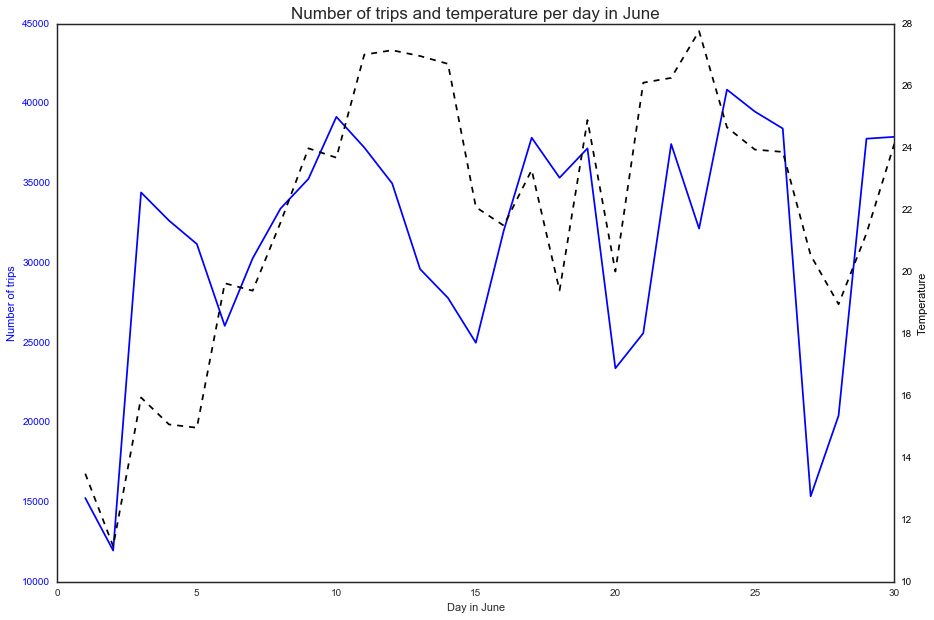

In [41]:
sns.set_style('white')

fig, ax1 = plt.subplots(figsize=(15,10))

june_day = aggregate_count_trips.index

number_trips = aggregate_count_trips.tripduration
ax1.plot(june_day, number_trips, 'b')
ax1.set_xlabel('Day in June')
for ticklabel in ax1.get_yticklabels():
    ticklabel.set_color('b')
ax1.set_ylabel('Number of trips',color='b')

ax2 = ax1.twinx()
temperature = aggregate_temperature.TemperatureC
ax2.plot(june_day, temperature, 'k--')
for ticklabel in ax2.get_yticklabels():
    ticklabel.set_color('k')
ax2.set_ylabel('Temperature',color='k')
plt.title('Number of trips and temperature per day in June', fontsize=17)
plt.show()

## 6) Trip distances and speeds <font color='blue'> </font>

### <font color='red'>Import the haversine package, that computes the haversine distance from one coordinate to another</font>

In [43]:
from haversine import haversine
help(haversine)

Help on function haversine in module haversine:

haversine(point1, point2, miles=False)
    Calculate the great-circle distance bewteen two points on the Earth surface.
    
    :input: two 2-tuples, containing the latitude and longitude of each point
    in decimal degrees.
    
    Example: haversine((45.7597, 4.8422), (48.8567, 2.3508))
    
    :output: Returns the distance bewteen the two points.
    The default unit is kilometers. Miles can be returned
    if the ``miles`` parameter is set to True.



### <font color='red'>Understand how the <i>haversine</i> function from the package can be used to compute a distance by running the following blocks</font>

In [44]:
x = data.iloc[0]

In [45]:
print 'Traveled haversine distance for trip 0: {:.1f} kilometers'.format(
    haversine((x['start station latitude'], x['start station longitude']),
              (x['end station latitude'], x['end station longitude'])))

Traveled haversine distance for trip 0: 3.8 kilometers


### <font color='red'>6.1) Complete the following function so it returns, for a given observation, the haversine distance from a start station to the end station</font>

In [46]:
def distance_stations(x):
    start_lat = x['start station latitude']
    start_long = x['start station longitude']
    end_lat = x['end station latitude']
    end_long = x['end station longitude']
    return haversine((start_lat, start_long), (end_lat, end_long))

### <font color='red'>6.2) What does the following block do ? It may take a minute or two to run</font>

In [47]:
data['traveled_distance'] = data.apply(distance_stations, axis=1)

### <font color='red'>6.3) Show <i>samples</i> of data, and see how the traveled distance has been added as a new feature in the dataset</font>

In [48]:
data.sample(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,Precipitationmm,Conditions,TemperatureC,start_day,is_weekend,start_moment,is_rainy,is_circle_trip,june_day,traveled_distance
293756,1370,2015-06-11 07:59:00,2015-06-11 08:22:00,394,E 9 St & Avenue C,40.725213,-73.977688,477,W 41 St & 8 Ave,40.756405,...,0,Partly Cloudy,22.8,Thursday,False,morning,False,False,11,3.620861
563072,1033,2015-06-19 12:35:00,2015-06-19 12:52:00,465,Broadway & W 41 St,40.755136,-73.986580,388,W 26 St & 10 Ave,40.749718,...,0,Clear,22.8,Friday,False,morning,False,False,19,1.504773


### <font color='red'>6.4) Compute the average speed (in km/h) by dividing two dataframe columns</font>

In [49]:
data['average_speed'] = 3600*data.traveled_distance/data.tripduration

### <font color='red'>Run the following block to compute the mean speed on non-loopy trips </font>

In [50]:
mean_speed = mean(data['average_speed'][data['average_speed'] != 0])

In [56]:
print mean_speed

8.68636035154


### <font color='red'>6.5) Keep only trips for which the speed is under 50 km/h </font>

In [51]:
data = data[data['average_speed'] < 50]

### <font color='red'>What does the following block do ?</font>

In [54]:
data.loc[data['average_speed']==0,'average_speed'] = mean_speed

### <font color='red'>6.7) Using <i>seaborn.distplot</i>, plot the distribution of speeds</font>

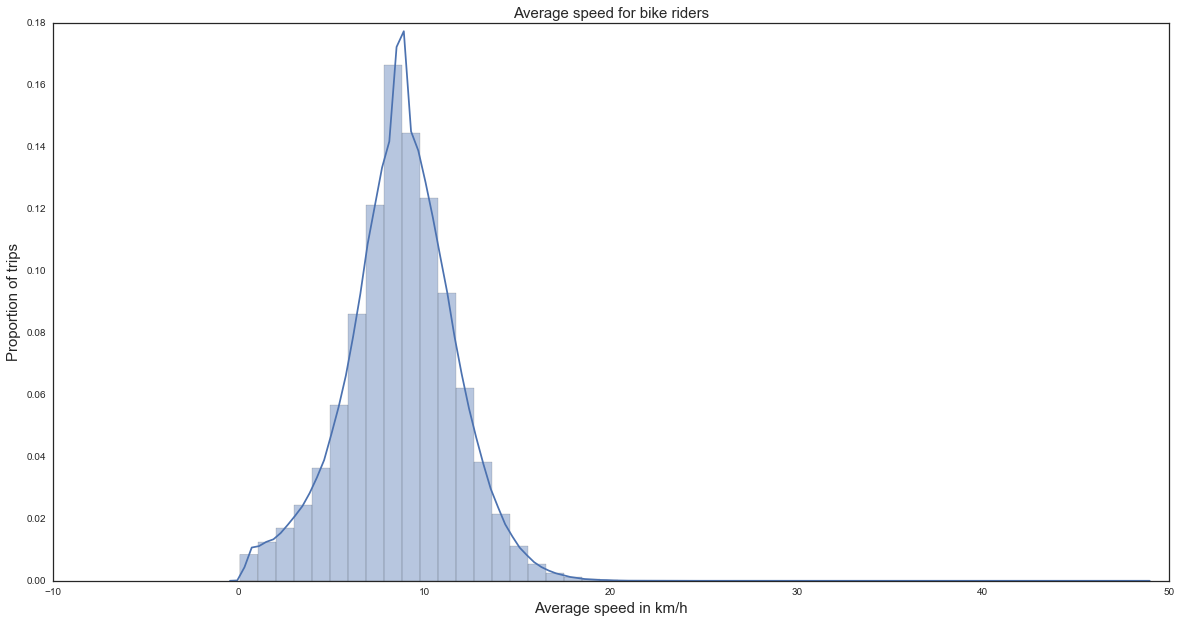

In [55]:
plt.figure(figsize=(20,10))
sns.distplot(data['average_speed'])
plt.xlabel('Average speed in km/h',fontsize=15)
plt.ylabel('Proportion of trips',fontsize=15)
plt.title('Average speed for bike riders',fontsize=15)

### <font color='red'>6.8) Subsidiary question : plot the average speed vs. the total distance. What do you observe ? You can use the following function: </font>
- seaborn.regplot()
- data_sample = data.sample(1000) so as not to overload the graph

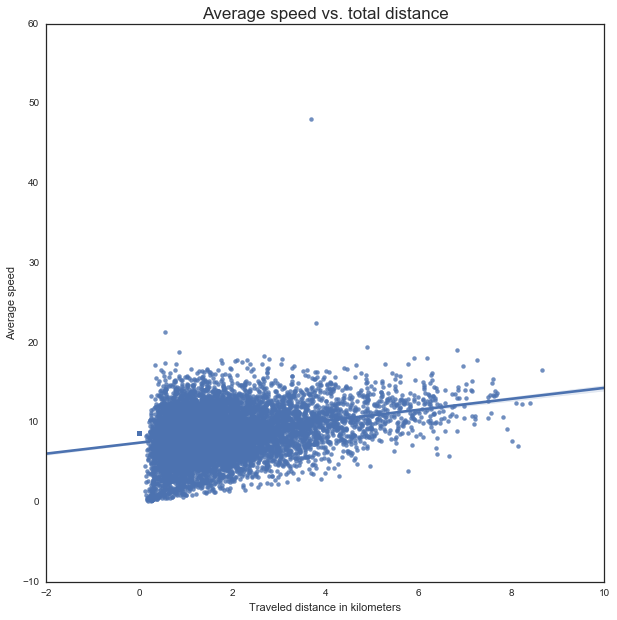

In [57]:
sample_data = data.sample(10000)
plt.figure(figsize=(10,10))
sns.regplot(x="traveled_distance", y="average_speed", data = sample_data);
plt.xlabel('Traveled distance in kilometers')
plt.ylabel('Average speed')
plt.title('Average speed vs. total distance', fontsize = 17)
plt.show()

# Save dataset to csv file

In [218]:
data.to_csv('my_data_after_feature_engineering.csv', index=False)